# 3.4 Modèle sous SciKit

## Préparation
#### Importation des librairies

In [1]:
#Importation des librairies
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, math
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTENC
import warnings
warnings.filterwarnings('ignore')

#### Importation du dataset

In [2]:
df_logisticReg = pd.read_pickle('./Datasets/complete_dataset_with_scaling.pkl')
df_logisticReg

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,0,Travel_Rarely,Sales,-0.393608,BAC+2,Life Sciences,1,Healthcare Representative,1.404934,-0.678721,...,2.485416,-0.980966,-0.679016,-1.155739,0.001133,Importante,Excellent,Élevé,Très élevé,Satisfaisant
1,1,Travel_Frequently,Research & Development,0.100215,BAC,Life Sciences,1,Research Scientist,-0.491658,-1.079751,...,0.156362,-0.327532,-0.368619,-0.034213,-0.374512,Moyenne,Au delà des attentes,Élevé,Moyen,Excellent
2,0,Travel_Frequently,Research & Development,0.964405,BAC+5,Other,4,Sales Executive,2.724709,-0.678721,...,-0.619989,-0.327532,-0.679016,-0.314594,-0.394701,Importante,Excellent,Moyen,Moyen,Mauvais
3,0,Non-Travel,Research & Development,-0.887430,Doctorat,Life Sciences,3,Human Resources,0.386209,0.123338,...,1.709065,0.162543,1.493766,0.246168,0.423143,Moyenne,Excellent,Très élevé,Très élevé,Très satisfaisant
4,0,Travel_Rarely,Research & Development,0.100215,BAC,Medical,1,Sales Executive,-0.884064,0.524367,...,-0.619989,-0.164174,-0.679016,-0.034213,2.225312,Importante,Excellent,Très élevé,Faible,Très satisfaisant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,Travel_Rarely,Sales,-0.640519,BAC+3,Other,2,Human Resources,-0.629754,-0.678721,...,-0.619989,-0.164174,-0.368619,0.246168,0.753301,Moyenne,Excellent,Élevé,Très élevé,Très satisfaisant
4405,0,Travel_Rarely,Research & Development,-0.517063,BAC+5,Medical,1,Research Scientist,-0.100739,0.123338,...,1.709065,-0.654249,-0.679016,-0.594976,-1.065012,Importante,Excellent,Très élevé,Faible,Très satisfaisant
4406,0,Travel_Rarely,Research & Development,-0.887430,BAC+5,Medical,1,Laboratory Technician,-0.812466,-0.277692,...,-0.619989,-0.654249,-0.679016,-0.594976,-0.123943,Moyenne,Excellent,Très élevé,Très élevé,Très satisfaisant
4407,0,Travel_Rarely,Research & Development,1.952050,BAC+2,Life Sciences,2,Sales Executive,-0.595124,-1.079751,...,0.932714,-0.490890,-0.368619,-0.594976,1.407586,Importante,Au delà des attentes,Faible,Élevé,Très satisfaisant


In [3]:
#liste des données catégorielles
catcoldf = df_logisticReg.select_dtypes(include='object')
catcolname = list(catcoldf.columns.values)
catcolname

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'JobLevel',
 'JobRole',
 'JobInvolvement',
 'PerformanceRating',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

In [4]:
#remplacement des données catégorielles par des données numériques
df_logisticReg = pd.get_dummies(df_logisticReg, columns = catcolname)
df_logisticReg.head()

,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,EnvironmentSatisfaction_Très élevé,EnvironmentSatisfaction_Élevé,JobSatisfaction_Faible,JobSatisfaction_Moyen,JobSatisfaction_Très élevé,JobSatisfaction_Élevé,WorkLifeBalance_Excellent,WorkLifeBalance_Mauvais,WorkLifeBalance_Satisfaisant,WorkLifeBalance_Très satisfaisant
0,0,-0.393608,1.404934,-0.678721,-1.150723,-0.932212,-1.321970,2.485416,-0.980966,-0.679016,...,0,1,0,0,1,0,0,0,1,0
1,1,0.100215,-0.491658,-1.079751,2.129051,0.241773,-0.678839,0.156362,-0.327532,-0.368619,...,0,1,0,1,0,0,1,0,0,0
2,0,0.964405,2.724709,-0.678721,-0.057465,2.589744,-0.807466,-0.619989,-0.327532,-0.679016,...,0,0,0,1,0,0,0,1,0,0
3,0,-0.887430,0.386209,0.123338,-1.150723,2.589744,0.221544,1.709065,0.162543,1.493766,...,1,0,0,0,1,0,0,0,0,1
4,0,0.100215,-0.884064,0.524367,-0.877408,1.415759,-0.292961,-0.619989,-0.164174,-0.679016,...,1,0,1,0,0,0,0,0,0,1


#### Séparation du dataset en deux jeux d'entrainement et de test

In [5]:
X = df_logisticReg.drop('Attrition', axis=1)
y = df_logisticReg['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Matrice de corrélation des données

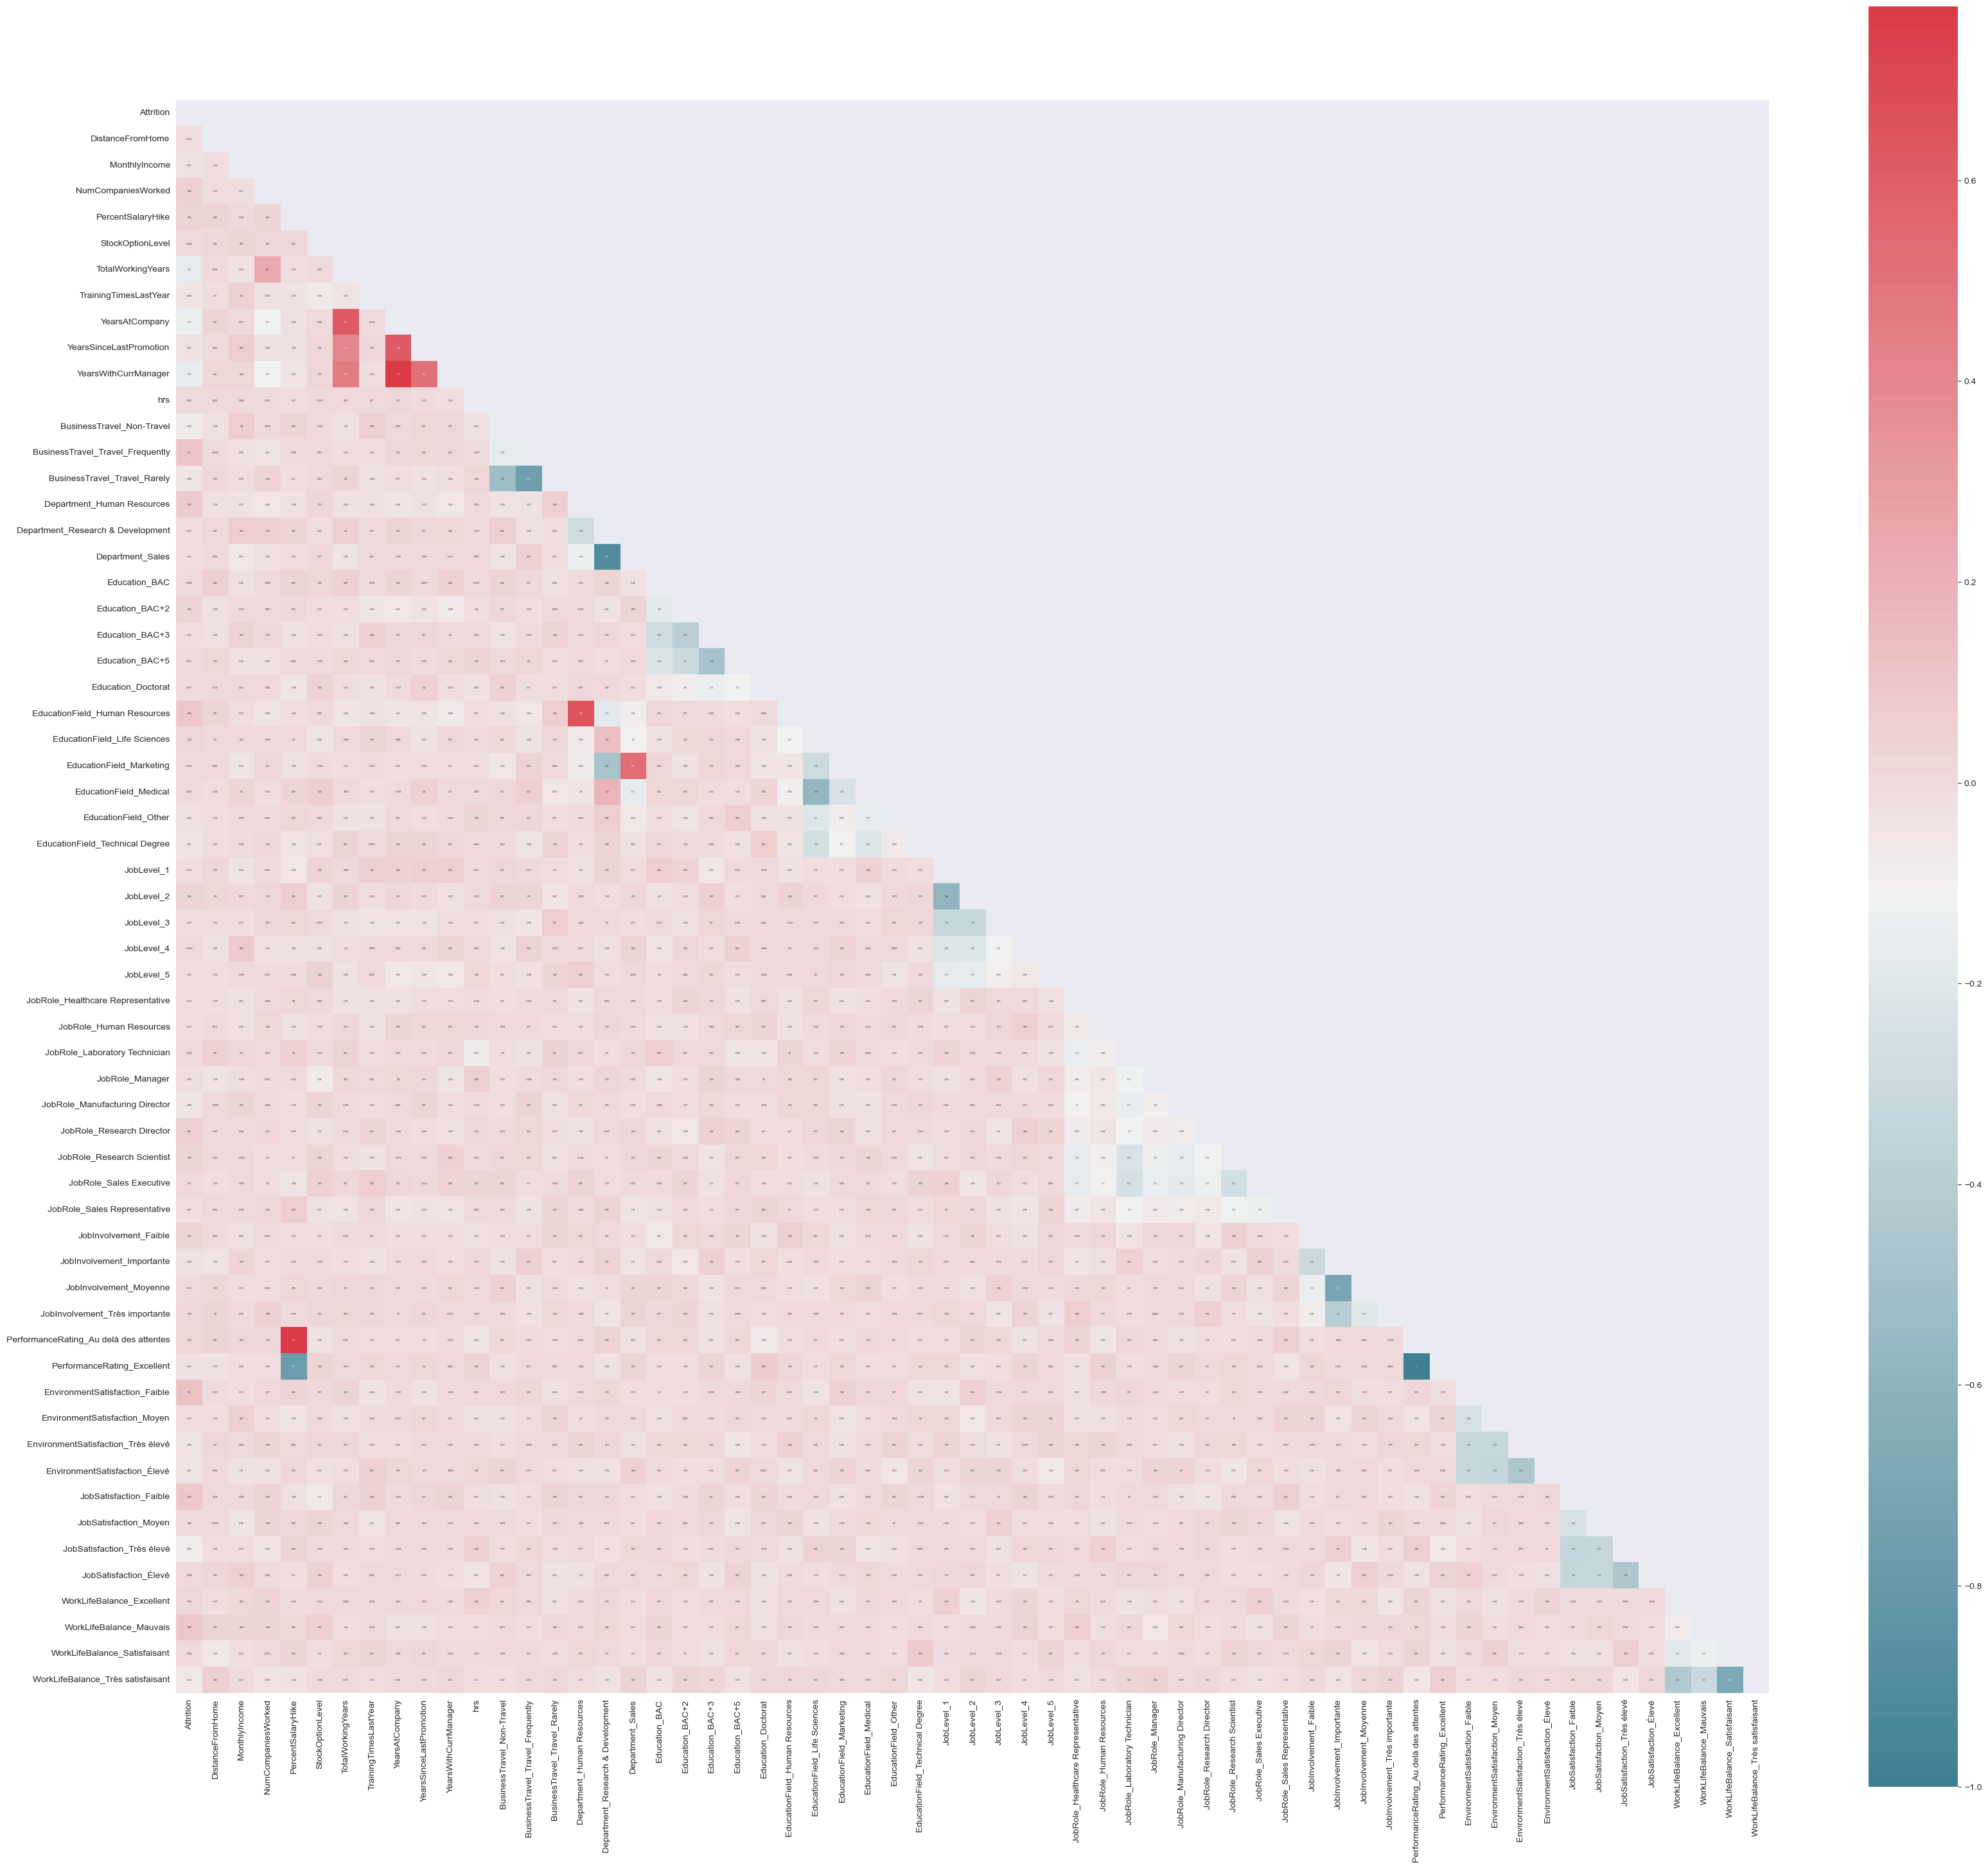

In [6]:
# Fonction de génération de graphiques de corrélation
def plot_correlation_map( df, Size=25 ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( Size , Size ) )
    triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        mask=triangle_mask,
        annot = True,
        annot_kws = { 'fontsize' : 2 }
    )

plot_correlation_map(df_logisticReg,40)

## Création du modèle de régression logistique

#### Entraînement du modèle

In [7]:
#entrainement du modèle
logisticRegr = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight="balanced")
logisticRegr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

#### Prédictions sur le set d'entraînement

In [8]:
#prédictions sur le set d'entrainement
y_pred_train = logisticRegr.predict(X_train)

#calcul des indicateurs de performance
lraccuracy = accuracy_score(y_train, y_pred_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
lrroc_auc = auc(fpr, tpr)
lrf1_score = f1_score(y_train, y_pred_train)
lrrecall = recall_score(y_train, y_pred_train)
mae = metrics.mean_absolute_error(y_train, y_pred_train)
mse = metrics.mean_squared_error(y_train, y_pred_train)


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print('Model Accuracy: ', lraccuracy)
print('ROC_AUC Score: ', lrroc_auc)
print('F1 Score: ', lrf1_score)
print('Recall Score: ', lrrecall)

Results of sklearn.metrics:
MAE: 0.29798695775446554
MSE: 0.29798695775446554
Model Accuracy:  0.7020130422455344
ROC_AUC Score:  0.7102058785673332
F1 Score:  0.4436209634727369
Recall Score:  0.7224137931034482


#### Matrice de confusion pour le set d'entraînement

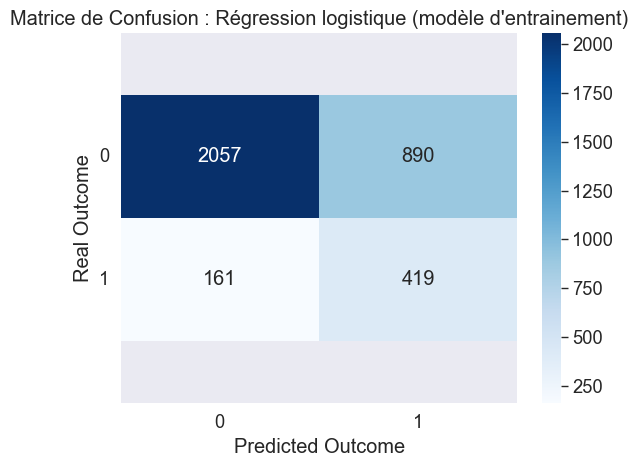

In [9]:
#affichage de la matrice de confusion pour le modèle d'entrainement
sns.set(context="paper", font_scale=1.5)
lrcm = confusion_matrix(y_train, y_pred_train)

ax = heatmap = sns.heatmap(lrcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Matrice de Confusion : Régression logistique (modèle d\'entrainement)')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

### Courbe ROC

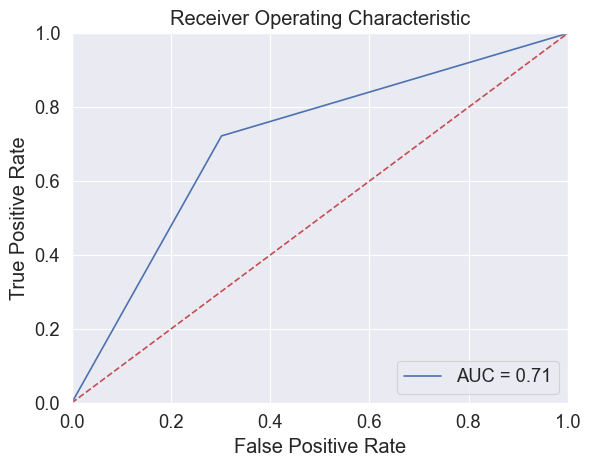

In [10]:
#Courbe roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % lrroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Fine-tuning du modèle
### Méthode RFE

In [11]:
#Détermination de la RFE pour toutes nos colonnes
rfe = RFE(logisticRegr)
rfe = rfe.fit(X_train, y_train)
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('DistanceFromHome', False, 14),
 ('MonthlyIncome', False, 4),
 ('NumCompaniesWorked', True, 1),
 ('PercentSalaryHike', False, 7),
 ('StockOptionLevel', False, 22),
 ('TotalWorkingYears', True, 1),
 ('TrainingTimesLastYear', True, 1),
 ('YearsAtCompany', True, 1),
 ('YearsSinceLastPromotion', True, 1),
 ('YearsWithCurrManager', True, 1),
 ('hrs', False, 8),
 ('BusinessTravel_Non-Travel', True, 1),
 ('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', False, 29),
 ('Department_Human Resources', True, 1),
 ('Department_Research & Development', False, 23),
 ('Department_Sales', True, 1),
 ('Education_BAC', False, 18),
 ('Education_BAC+2', False, 2),
 ('Education_BAC+3', False, 11),
 ('Education_BAC+5', False, 24),
 ('Education_Doctorat', True, 1),
 ('EducationField_Human Resources', True, 1),
 ('EducationField_Life Sciences', False, 5),
 ('EducationField_Marketing', False, 31),
 ('EducationField_Medical', False, 16),
 ('EducationField_Other', True, 1),
 ('Educ

In [12]:
#récupération des colonnes jugées utiles par la RFE
true_col = X.columns[rfe.support_]
#récupération des colonnes jugées inutiles par la RFE
false_col = X.columns[~rfe.support_]

In [13]:
#suppression des colonnes inutiles de notre jeu de données
df_logisticReg = df_logisticReg.drop(columns=false_col)
#affichage du jeu de données mis à jour
df_logisticReg

,Attrition,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobInvolvement_Importante,JobInvolvement_Moyenne,EnvironmentSatisfaction_Faible,JobSatisfaction_Faible,JobSatisfaction_Très élevé,WorkLifeBalance_Mauvais,WorkLifeBalance_Très satisfaisant
0,0,-0.678721,-1.321970,2.485416,-0.980966,-0.679016,-1.155739,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,-1.079751,-0.678839,0.156362,-0.327532,-0.368619,-0.034213,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,0,-0.678721,-0.807466,-0.619989,-0.327532,-0.679016,-0.314594,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,0,0.123338,0.221544,1.709065,0.162543,1.493766,0.246168,1,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0.524367,-0.292961,-0.619989,-0.164174,-0.679016,-0.034213,0,0,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,-0.678721,-0.678839,-0.619989,-0.164174,-0.368619,0.246168,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4405,0,0.123338,-0.164335,1.709065,-0.654249,-0.679016,-0.594976,0,0,0,...,1,0,0,1,0,0,1,0,0,1
4406,0,-0.277692,-0.164335,-0.619989,-0.654249,-0.679016,-0.594976,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4407,0,-1.079751,-0.807466,0.932714,-0.490890,-0.368619,-0.594976,0,0,0,...,0,1,0,1,0,1,0,0,0,1


In [14]:
#séparation du nouveau jeu de données
X = df_logisticReg.drop('Attrition', axis=1)
y = df_logisticReg['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Nouvelle matrice de corrélation

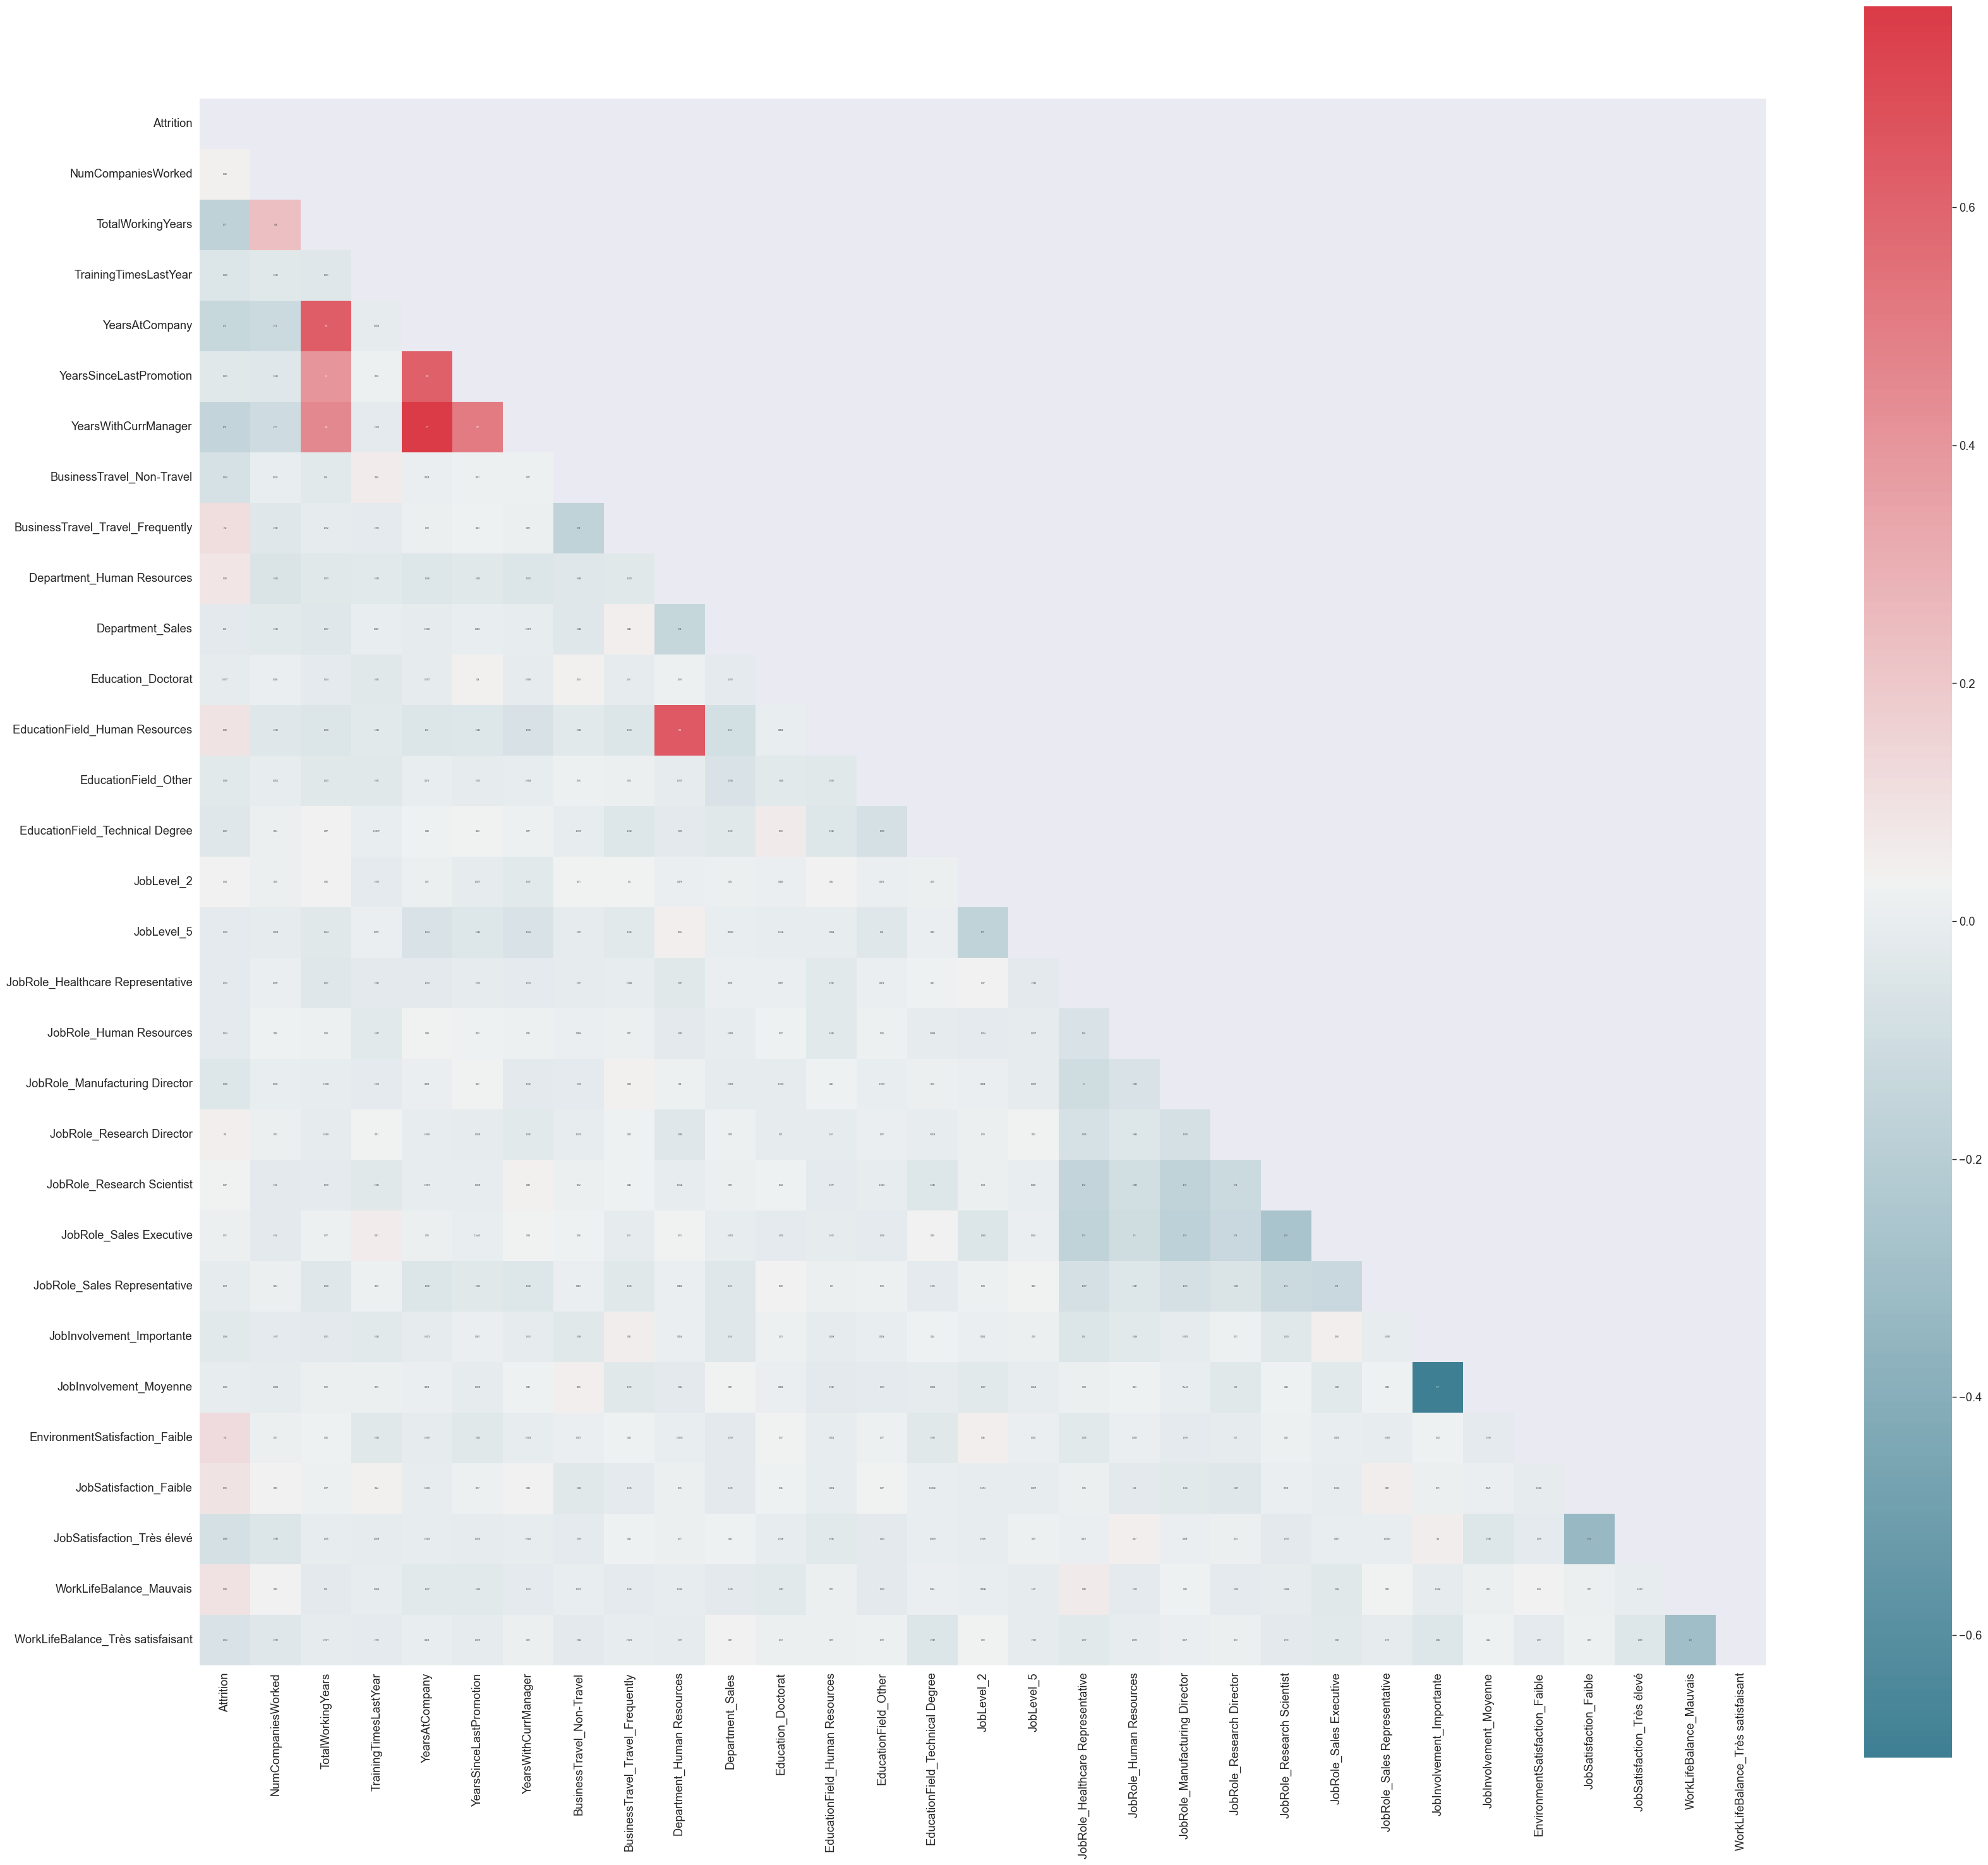

In [15]:
# Fonction de génération de graphiques de corrélation
def plot_correlation_map( df, Size=25 ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( Size , Size ) )
    triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        mask=triangle_mask,
        annot = True,
        annot_kws = { 'fontsize' : 2 }
    )

plot_correlation_map(df_logisticReg,40)

## Création du modèle de régression logistique après fine-tuning

#### Entraînement du modèle après fine-tuning

In [16]:
#entrainement du modèle
logisticRegr = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight="balanced")
logisticRegr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', random_state=42,
                   solver='liblinear')

#### Prédictions sur le set d'entraînement après fine-tuning

In [17]:
#prédictions sur le set d'entrainement
y_pred_train = logisticRegr.predict(X_train)

#calcul des indicateurs de performance
lraccuracy = accuracy_score(y_train, y_pred_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
lrroc_auc = auc(fpr, tpr)
lrf1_score = f1_score(y_train, y_pred_train)
lrrecall = recall_score(y_train, y_pred_train)
mae = metrics.mean_absolute_error(y_train, y_pred_train)
mse = metrics.mean_squared_error(y_train, y_pred_train)


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print('Model Accuracy: ', lraccuracy)
print('ROC_AUC Score: ', lrroc_auc)
print('F1 Score: ', lrf1_score)
print('Recall Score: ', lrrecall)

Results of sklearn.metrics:
MAE: 0.30535866175219734
MSE: 0.30535866175219734
Model Accuracy:  0.6946413382478027
ROC_AUC Score:  0.7057946128734072
F1 Score:  0.437597911227154
Recall Score:  0.7224137931034482


#### Matrice de confusion pour le set d'entraînement après fine-tuning

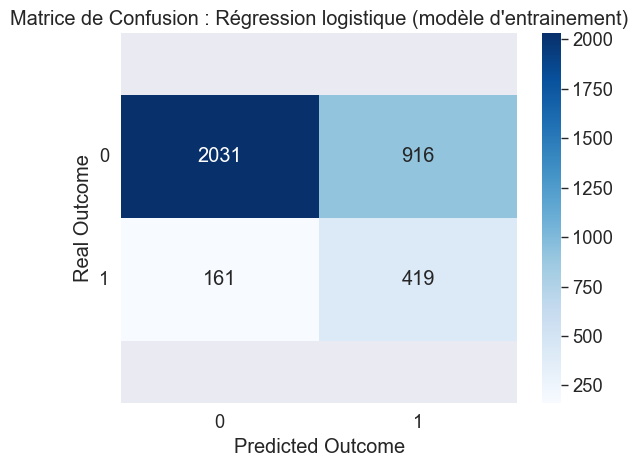

In [18]:
#affichage de la matrice de confusion pour le modèle d'entrainement
sns.set(context="paper", font_scale=1.5)
lrcm = confusion_matrix(y_train, y_pred_train)

ax = heatmap = sns.heatmap(lrcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Matrice de Confusion : Régression logistique (modèle d\'entrainement)')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

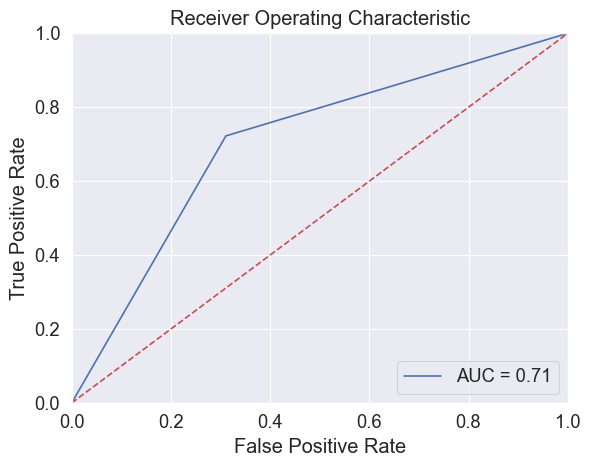

In [19]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % lrroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Prédictions du modèle sur le set de test

In [20]:
#prédictions sur le set de test
y_test_predict = logisticRegr.predict(X_test)

#calcul des indicateurs de performance
lraccuracy = accuracy_score(y_test, y_test_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
lrroc_auc = auc(fpr, tpr)
lrf1_score = f1_score(y_test, y_test_predict)
lrrecall = recall_score(y_test, y_test_predict)
mae = metrics.mean_absolute_error(y_test, y_test_predict)
mse = metrics.mean_squared_error(y_test, y_test_predict)


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print('Model Accuracy: ', lraccuracy)
print('ROC_AUC Score: ', lrroc_auc)
print('F1 Score: ', lrf1_score)
print('Recall Score: ', lrrecall)

Results of sklearn.metrics:
MAE: 0.336734693877551
MSE: 0.336734693877551
Model Accuracy:  0.6632653061224489
ROC_AUC Score:  0.6699210213354205
F1 Score:  0.37473684210526315
Recall Score:  0.6793893129770993


#### Matrice de confusion sur le set de test

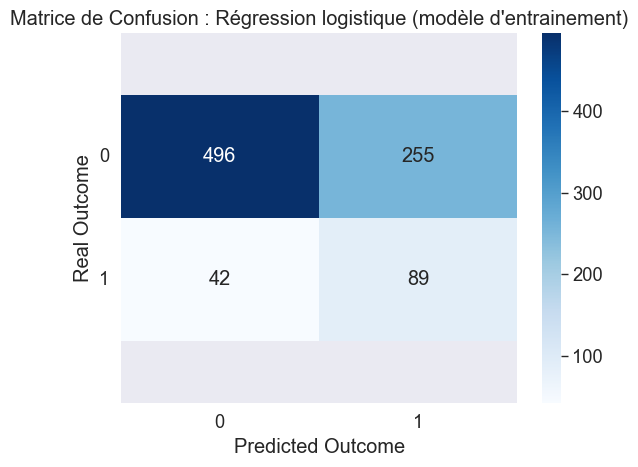

In [21]:
#affichage de la matrice de confusion pour le modèle d'entrainement
sns.set(context="paper", font_scale=1.5)
lrcm = confusion_matrix(y_test, y_test_predict)

ax = heatmap = sns.heatmap(lrcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Matrice de Confusion : Régression logistique (modèle d\'entrainement)')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#### Courbe ROC sur le set de test

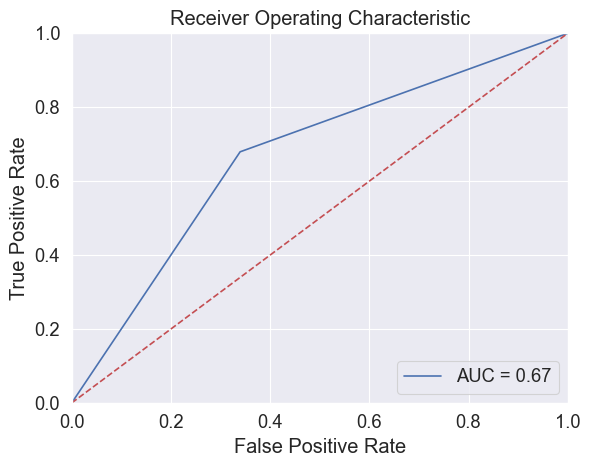

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % lrroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

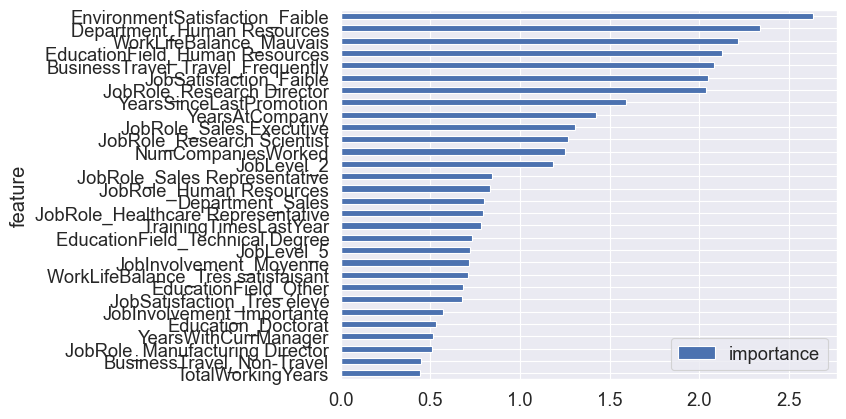

In [23]:
feature_names = np.array(X.columns)
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, logisticRegr.coef_[0])
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance.plot.barh(x='feature', y='importance')
plt.show()